In [1]:
# USAGE
# python build_face_dataset.py --cascade haarcascade_frontalface_default.xml --output dataset/adrian
# import the necessary packages
from imutils.video import VideoStream
import argparse
import imutils
import time
import cv2
import os

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-c", "--cascade", required=True,
    help = "path to where the face cascade resides")
ap.add_argument("-o", "--output", required=True,
    help="path to output directory")
args = vars(ap.parse_args())

# load OpenCV's Haar cascade for face detection from disk
detector = cv2.CascadeClassifier(args["cascade"])

# initialize the video stream, allow the camera sensor to warm up,
# and initialize the total number of example faces written to disk
# thus far
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
# vs = VideoStream(usePiCamera=True).start()
time.sleep(2.0)
total = 0

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream, clone it, (just
    # in case we want to write it to disk), and then resize the frame
    # so we can apply face detection faster
    frame = vs.read()
    orig = frame.copy()
    frame = imutils.resize(frame, width=400)

    # detect faces in the grayscale frame
    rects = detector.detectMultiScale(
        cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), scaleFactor=1.1, 
        minNeighbors=5, minSize=(30, 30))

    # loop over the face detections and draw them on the frame
    for (x, y, w, h) in rects:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    p = os.path.sep.join([args["output"], "{}.png".format(str(total).zfill(5))])
    cv2.imwrite(p, orig)
    
    total += 1
    # if the `k` key was pressed, write the *original* frame to disk
    # so we can later process it and use it for face recognition
    #if key == ord("k"):
    #    p = os.path.sep.join([args["output"], "{}.png".format(
    #    str(total).zfill(5))])
    #    cv2.imwrite(p, orig)
    #    total += 1

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
print("[INFO] {} face images stored".format(total))
print("[INFO] cleaning up...")
cv2.destroyAllWindows()
vs.stop()

usage: ipykernel_launcher.py [-h] -c CASCADE -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -c/--cascade, -o/--output


SystemExit: 2

/home/robotics/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Convert images into grey scale then text and save them in one file

In [65]:
import cv2
import numpy as np
import glob
import random
import math
import itertools
import pickle
import os
#Emotion list
emotions = ["anger","contempt","disgust","fear", "happy", "neutral","sadness", "surprise"]
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def get_files(emotion):
    images = glob.glob("dataset/%s/*" %emotion)
    random.shuffle(images)
    training_set = images[:int(len(images)*0.7)]   #get 80% of image files to be trained
    testing_set = images[-int(len(images)*0.3):]   #get 20% of image files to be tested
    print("for emotion %s"%emotion)
    print("extracted %s images for training " %len(training_set))
    print("extracted %s images for testing " %len(testing_set))
    return training_set, testing_set

def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    for (x, y, w, h) in faces_rect:
        return cv2.resize(gray_image[y : y+h, x : x+w],(28,28))
    #print("no face dectacted from image with dim",gray_image.shape)
    return [[]]

def detect_faces_live(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    for (x, y, w, h) in faces_rect:
        return cv2.resize(gray_image[y : y+h, x : x+w],(28,28))
    #print("no face dectacted from image with dim",gray_image.shape)
    return cv2.resize(gray_image,(28,28))

def image2vector(image):
    """
    Returns 1D vector representation of the input 2D image.
    """
    image_height, image_width = image.shape
    image_vector = np.reshape(image, image_height*image_width)
    return image_vector

def make_sets():
    training_data = []
    training_label = []
    testing_data = []
    testing_label = []
    trds_size =0
    teds_size =0
    for emotion in emotions:
        x_train, x_test = get_files(emotion)
        #add data to training and testing dataset, and generate labels 0-7
        
        for item in x_train:
            #read image
            img = cv2.imread(item)
            landmarks_vec = detect_faces(face_cascade,img)
            if len(landmarks_vec) ==  28:
                training_data.append(image2vector(landmarks_vec))
                training_label.append(emotions.index(emotion))
        
        for item in x_test:
            img = cv2.imread(item)
            landmarks_vec = detect_faces(face_cascade,img)
            if len(landmarks_vec) ==  28:
                testing_data.append(image2vector(landmarks_vec))
                testing_label.append(emotions.index(emotion))
    
    return training_data, numpy.array(training_label).astype(np.int), testing_data, numpy.array(testing_label).astype(np.int).astype(np.int)

In [66]:
x_train, y_train, x_test, y_test = make_sets()

for emotion anger
extracted 191 images for training 
extracted 82 images for testing 
for emotion contempt
extracted 143 images for training 
extracted 61 images for testing 
for emotion disgust
extracted 123 images for training 
extracted 53 images for testing 
for emotion fear
extracted 98 images for training 
extracted 42 images for testing 
for emotion happy
extracted 123 images for training 
extracted 52 images for testing 
for emotion neutral
extracted 65 images for training 
extracted 28 images for testing 
for emotion sadness
extracted 134 images for training 
extracted 57 images for testing 
for emotion surprise
extracted 208 images for training 
extracted 89 images for testing 


In [27]:
import csv
import numpy
with open('processed_dataset/training_data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(x_train)
with open('processed_dataset/testing_data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(x_test)

In [29]:
def load_dataset(train_dataset='processed_dataset/training_data.csv', test_dataset='processed_dataset/testing_data.csv'):
    """
    Loads and returns train and test datasets.
    """
    data_train = np.genfromtxt(fname=train_dataset, delimiter=',',invalid_raise=False,filling_values=0)
    #y_train = data_train[:,0].astype(np.int)
    #y_t = y_train.astype(np.int)
    x_train = data_train[:,:] / 255.0
    data_test = np.genfromtxt(fname=test_dataset, delimiter=',',invalid_raise=False,filling_values=0)
    #y_test = data_test[:,0].astype(np.int)
    #y_test = y_test.astype(np.int)
    x_test = data_test[:,:] / 255.0
    return (x_train, x_test)

In [30]:
x_train, x_test= load_dataset()

In [31]:
print(x_train.shape)
print(x_test.shape)

(919, 784)
(378, 784)


In [32]:
def vector2image(image_vector, image_height= 28, image_width= 28):
    """
    Returns image representation of the input 1D vector.
    """
    image = np.reshape(image_vector, (image_height, image_width))
    return image

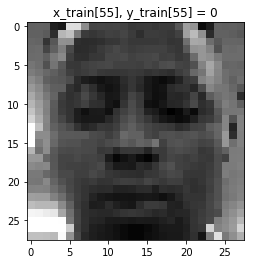

In [34]:
import matplotlib.pyplot as pl
import numpy as np
index = 55
image = vector2image(x_train[index],28,28)
pl.figure()
pl.imshow(image, cmap='gray')
pl.title('x_train[' + str(index) + '], ' + 'y_train[' + str(index) + '] = ' + str(y_train[index]))
pl.show()

In [35]:
class LR:
    def __init__(self):
        pass
    
    def parameters(self):
        return self.W
                
    def activation(self, s):
        return 1.0 / (1 + np.exp(-s)) # sigmoid function as activation function
    
    def feedforward(self, X): # output of the logistic regression
        S = np.dot(X, self.W)
        U = self.activation(S)
        return U
        
    def learn(self, X, Y, learning_rate=0.99, delta=1e-6, epoch_max=10000, seed=7):
        self.learning_rate = learning_rate
        self.delta = delta
        self.epoch_max = epoch_max
        self.seed = seed
        np.random.seed(seed)
        X = np.hstack((np.ones((X.shape[0],1)), X))
        print(X.shape)
        d = X.shape[1]
        C =  len(np.unique(Y))
        self.W = np.random.randn(d, C) * 0.01
        N = X.shape[0]
        Y_one_hot = np.zeros((N, C))
        Y_one_hot[np.arange(N), Y] = 1.0
        converged = False
        epoch = 1
        while not converged:
            U = self.feedforward(X)
            E = (U - Y_one_hot)
            D = U * (1-U) * E
            MSE = 1.0 / (2 * N) * np.sum(np.sum(E**2, axis=1))
            if (epoch%100) == 0:
                ACC = self.accuracy(X, Y, True)
                print('epoch = {0}, MSE = {1:.3f}, TRAIN ACC = {2:.3f}'.format(epoch, MSE, ACC))
            W_ = self.W.copy()
            self.W = self.W - self.learning_rate * 1.0/N * np.dot(X.T, D)
            epoch += 1
            if (np.max(np.abs(W_ - self.W)) <= self.delta) or (epoch >=self.epoch_max):
                converged = True        
        
    def classify(self, X, augmented=False):
        if not augmented:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        U = self.feedforward(X)
        L = np.argmax(U, axis=1)            
        return L
    
    def accuracy(self, X, Y, augmented=False):
        N = X.shape[0]
        L = self.classify(X, augmented)
        acc = np.sum(L == Y) / N
        return acc
    
    def confusion_matrix(self, X, Y):
        P = lr.classify(X)
        labels = np.unique(Y)
        CM = np.zeros((len(labels), len(labels)), dtype=np.int)
        for y, p in zip(Y, P):
            CM[y,p] = CM[y,p] + 1
        return CM        

In [36]:
lr = LR()
lr.learn(x_train, y_train, 0.99)

(919, 785)
epoch = 100, MSE = 0.414, TRAIN ACC = 0.350
epoch = 200, MSE = 0.279, TRAIN ACC = 0.613
epoch = 300, MSE = 0.218, TRAIN ACC = 0.741
epoch = 400, MSE = 0.185, TRAIN ACC = 0.760
epoch = 500, MSE = 0.166, TRAIN ACC = 0.787
epoch = 600, MSE = 0.154, TRAIN ACC = 0.795
epoch = 700, MSE = 0.146, TRAIN ACC = 0.801
epoch = 800, MSE = 0.133, TRAIN ACC = 0.849
epoch = 900, MSE = 0.104, TRAIN ACC = 0.889
epoch = 1000, MSE = 0.087, TRAIN ACC = 0.953
epoch = 1100, MSE = 0.070, TRAIN ACC = 0.963
epoch = 1200, MSE = 0.062, TRAIN ACC = 0.964
epoch = 1300, MSE = 0.057, TRAIN ACC = 0.966
epoch = 1400, MSE = 0.054, TRAIN ACC = 0.966
epoch = 1500, MSE = 0.050, TRAIN ACC = 0.967
epoch = 1600, MSE = 0.048, TRAIN ACC = 0.968
epoch = 1700, MSE = 0.046, TRAIN ACC = 0.968
epoch = 1800, MSE = 0.044, TRAIN ACC = 0.968
epoch = 1900, MSE = 0.042, TRAIN ACC = 0.971
epoch = 2000, MSE = 0.040, TRAIN ACC = 0.972
epoch = 2100, MSE = 0.039, TRAIN ACC = 0.976
epoch = 2200, MSE = 0.037, TRAIN ACC = 0.977
epoch = 

In [38]:
print('TEST ACC = {0:.3f}'.format(lr.accuracy(x_test, y_test)))

TEST ACC = 0.963


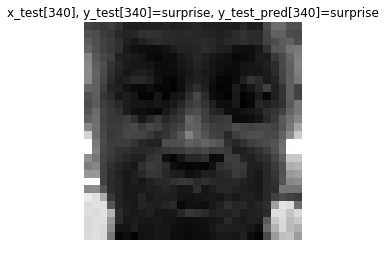

In [39]:
i = 340
image_test = vector2image(x_test[i])
image_test_label = y_test[i]
image_test_label_predicted = lr.classify(x_test[i][np.newaxis, :])[0]
pl.figure()
pl.imshow(image_test, cmap='gray')
pl.axis('off')
pl.title('x_test[{0}], y_test[{0}]={1}, y_test_pred[{0}]={2}'.format(i, emotions[image_test_label], emotions[image_test_label_predicted]))
pl.show()

In [70]:
import cv2
import numpy as np
import os 

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0
# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

while True:
    img = cv2.imread(img)
    img = cv2.flip(img, -1) # Flip vertically
    # create a copy of the image to prevent any changes to the original one.
    image_copy = img.copy()
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    #draw the recognised face
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        image_test = image2vector(cv2.resize(gray_image[y : y+h, x : x+w],(28,28)))
        image_test_label_predicted = lr.classify(image_test[np.newaxis, :])[0]
        id = emotions[image_test_label_predicted]
        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )  
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break

# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

## Dimensionality Reduction using Principal Component Analysis (PCA)

In order to perfom PCA, we need to compute the mean vector and covariance matrix of the dataset. Note that in your class notes for PCA, datasets are represented in column-major order. In previous sections, we are using row-major order.

In [40]:
def find_principal_components(x, suppress_output=False):
    """
    Finds and returns the principal components.
    """
    N = x.shape[0]
    D = x.shape[1]
    mu = np.mean(x, axis = 0)
    C = 1.0 / (N-1) * np.dot((x-mu).T, (x-mu))
    LD, PD = np.linalg.eigh(C) # note that this produces eigenvalues (LD) and corresponding eigenvectors (PD) sorted in ascending order of eigenvalues
    LD = LD[::-1] # reverse LD
    PD = PD[:, ::-1] # reverse PD    
    if not suppress_output:
        pl.figure('Selected Eigenvalues')
        pl.plot(LD)
        pl.xlabel('Eigenvalue #')
        pl.ylabel('Eigenvalue')    
    return (mu, PD, LD)

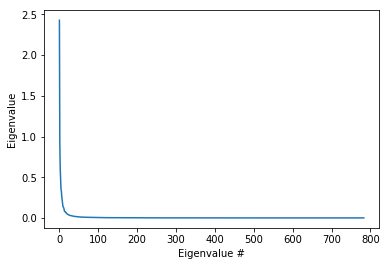

In [41]:
mu, PD, LD = find_principal_components(x_train)

As you notice from the above plot of all eigenvalues, majority of eigenvalues have small values. Thus we can use total variation as a metric to select the significant principal components, i.e.:

In [56]:
delta = 0.99 # total variation
d = np.argwhere(delta < np.cumsum(LD)/np.sum(LD))[0][0] # very first index of normalised cumulative sum of eigenvalues satisfying total variation requirement
print('The number of principal components satisfying total variation of {:.2f} is {:d}'.format(delta, d))

The number of principal components satisfying total variation of 0.99 is 205


As you can see above, even if we want to retain 99% of total variation, reduced dimensionality $d$ is significantly smaller than the dimensionality $D$ of data points. Lets display those $d$ eigenvectors.

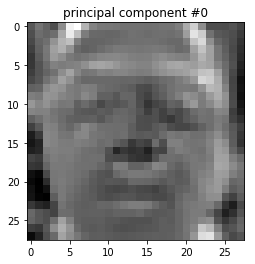

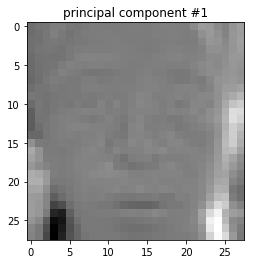

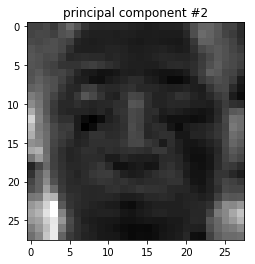

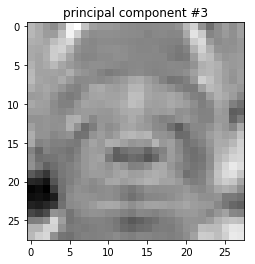

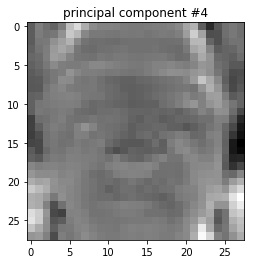

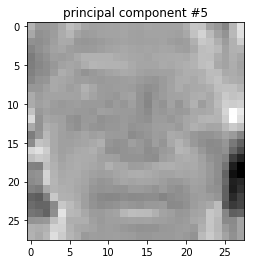

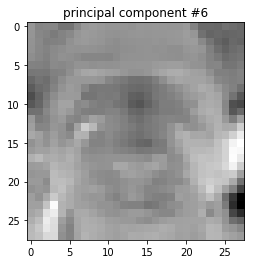

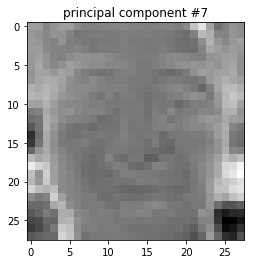

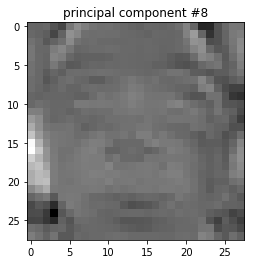

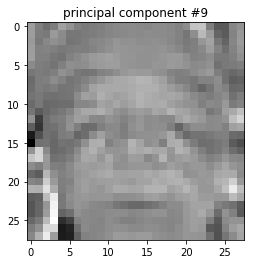

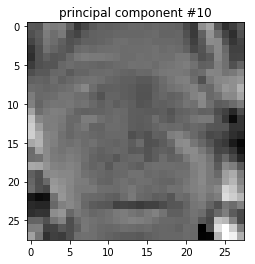

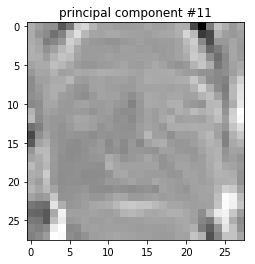

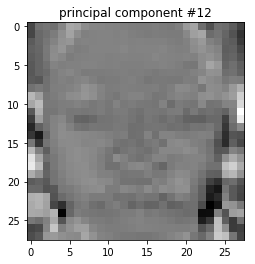

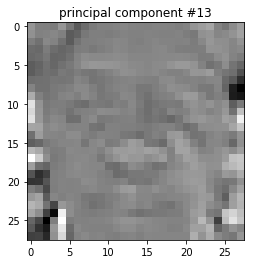

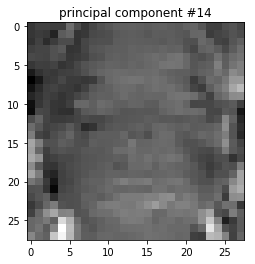

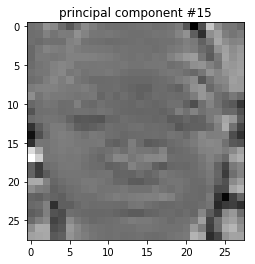

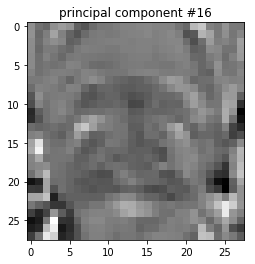

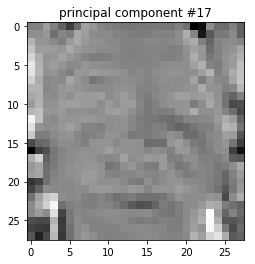

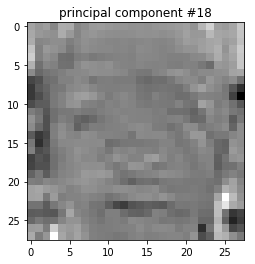

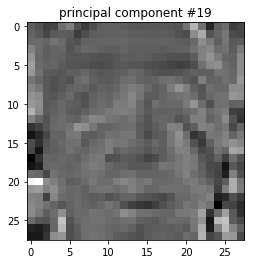

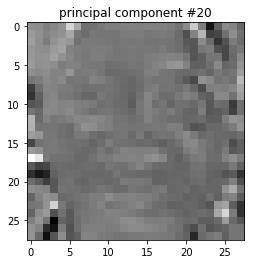

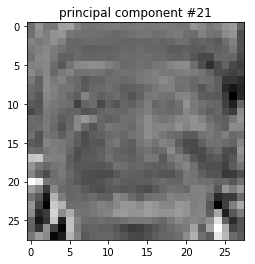

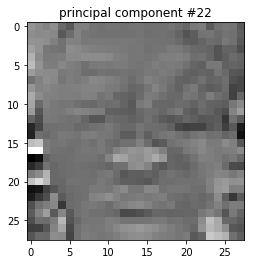

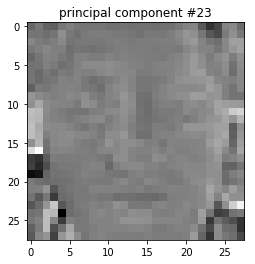

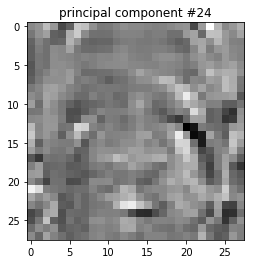

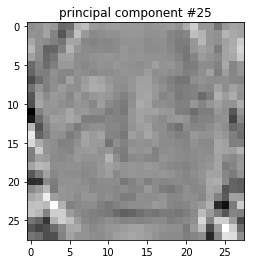

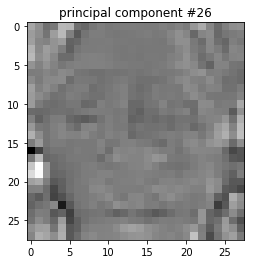

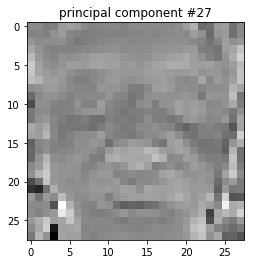

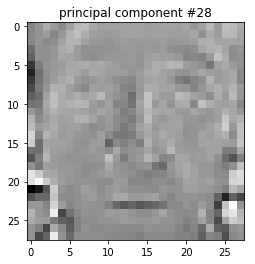

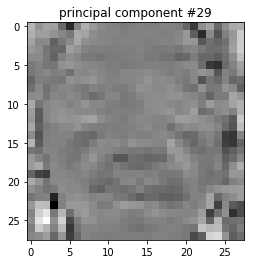

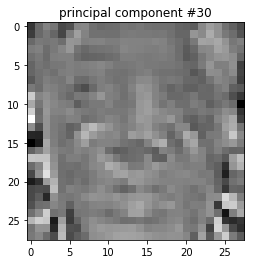

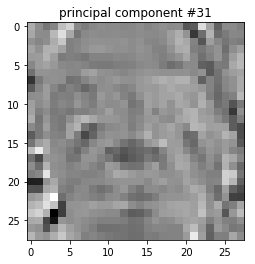

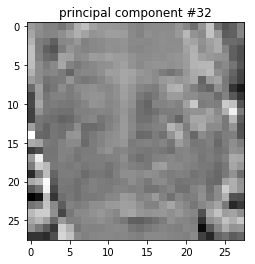

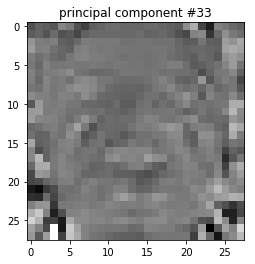

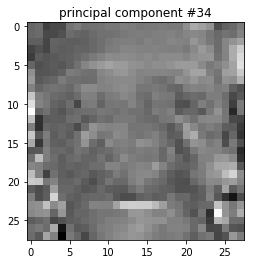

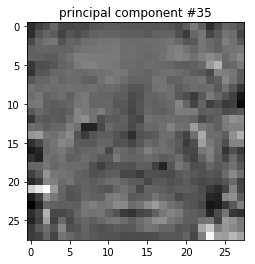

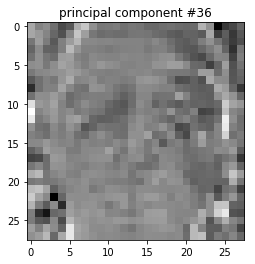

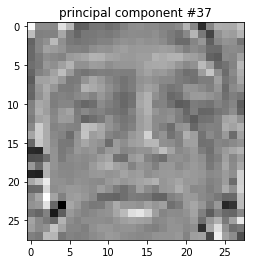

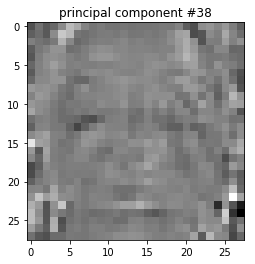

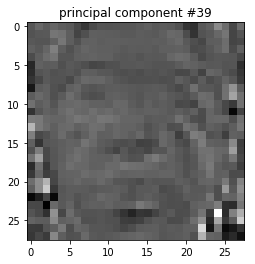

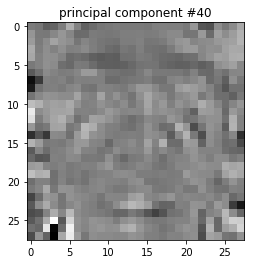

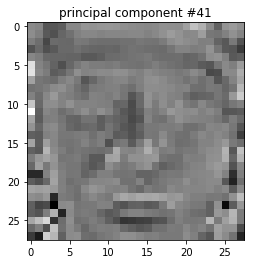

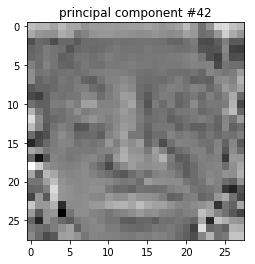

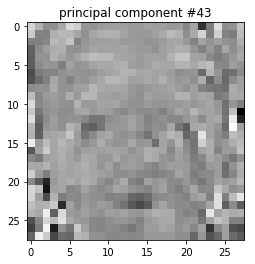

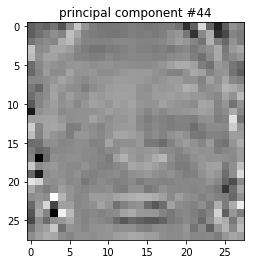

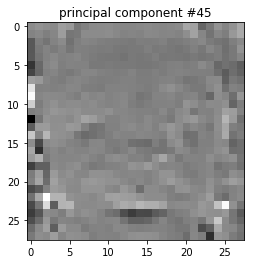

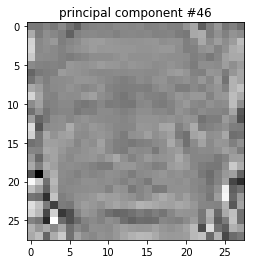

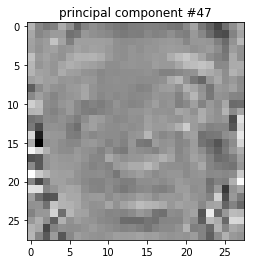

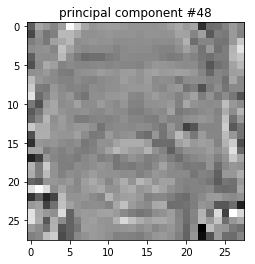

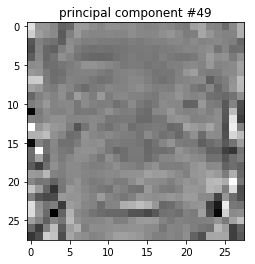

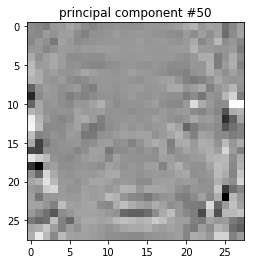

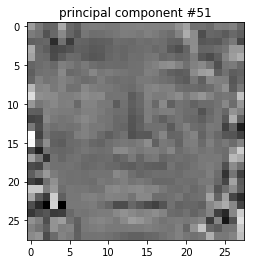

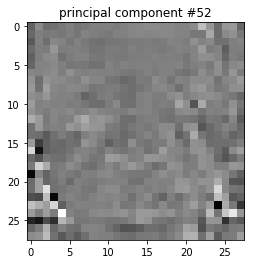

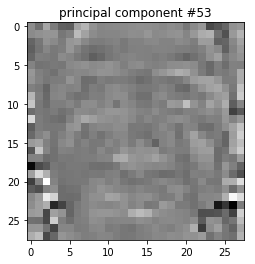

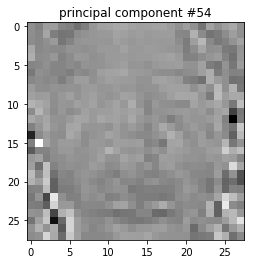

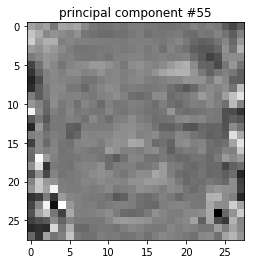

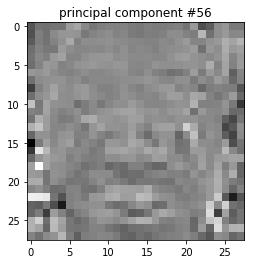

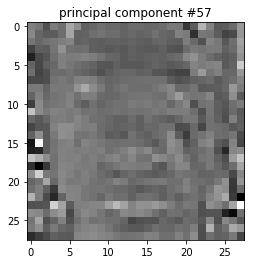

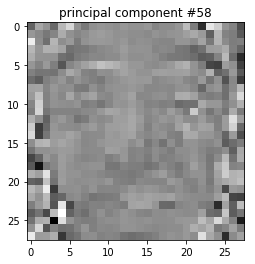

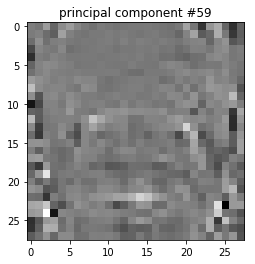

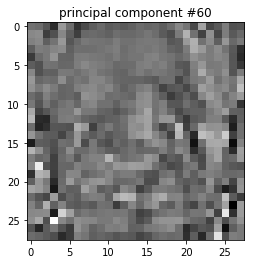

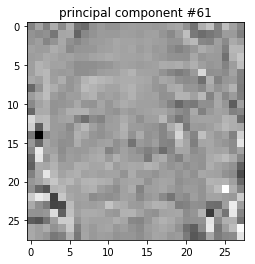

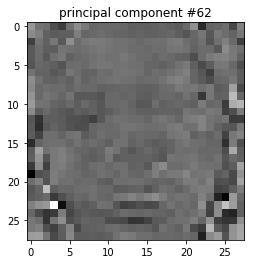

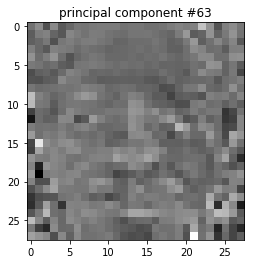

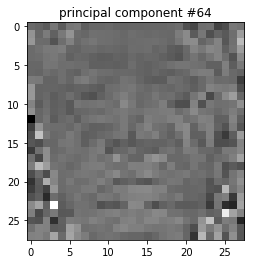

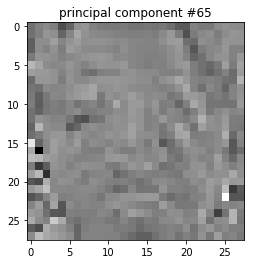

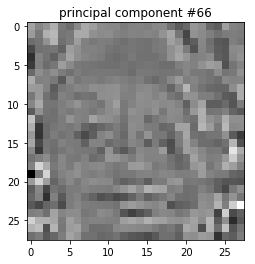

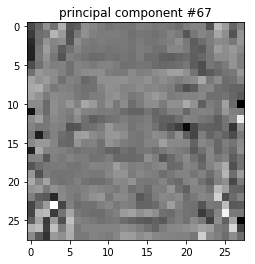

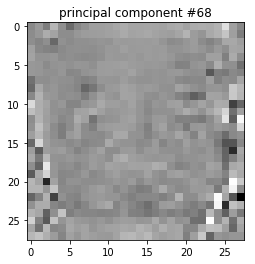

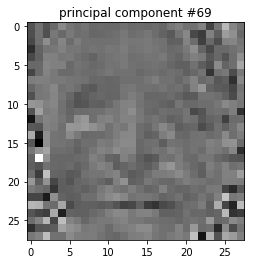

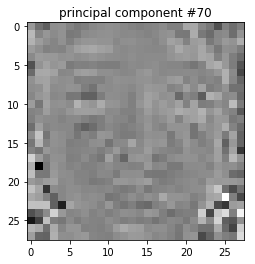

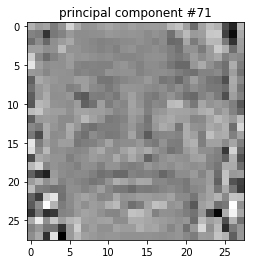

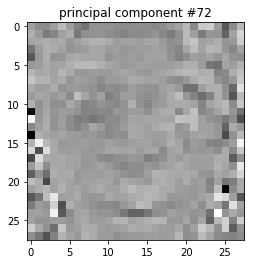

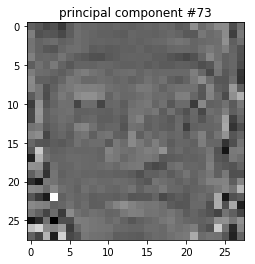

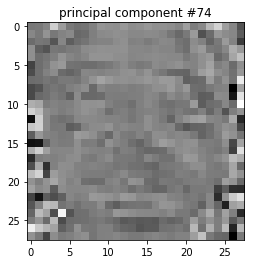

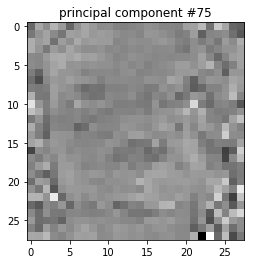

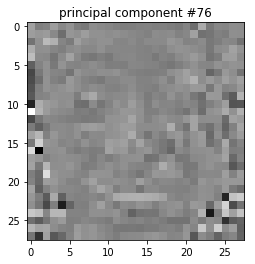

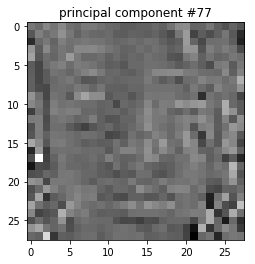

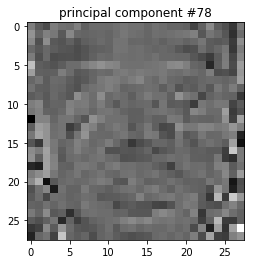

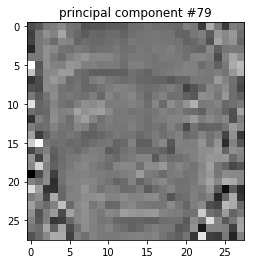

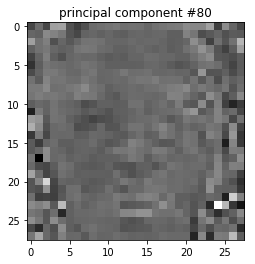

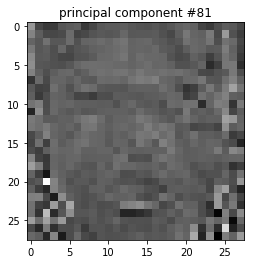

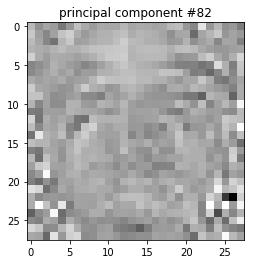

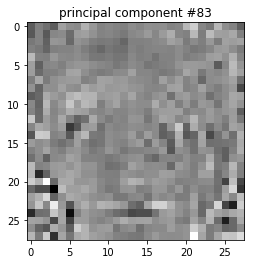

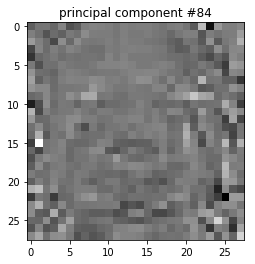

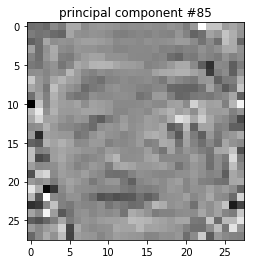

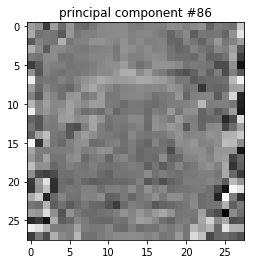

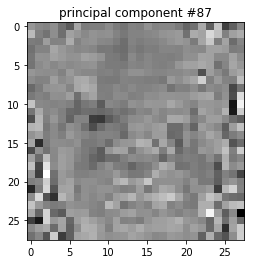

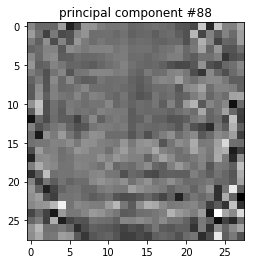

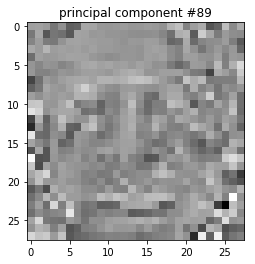

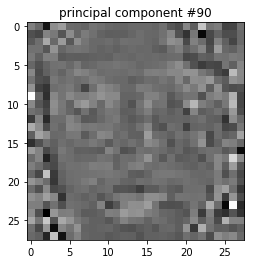

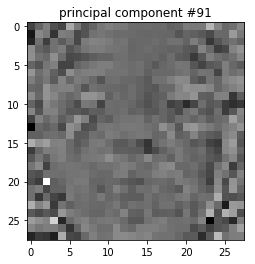

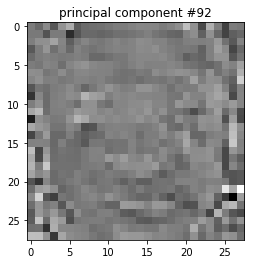

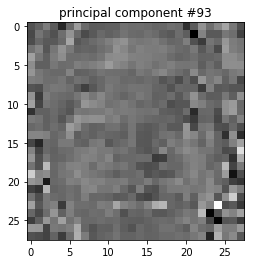

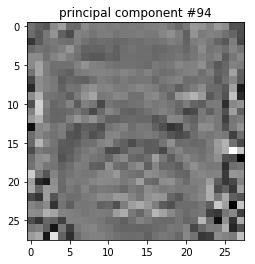

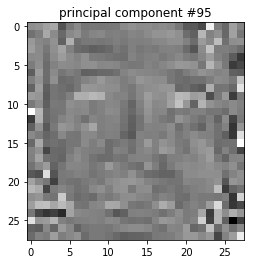

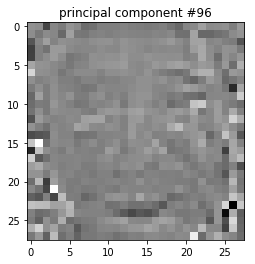

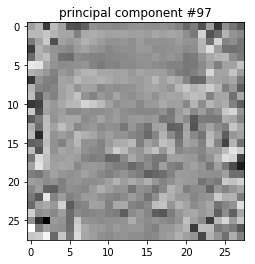

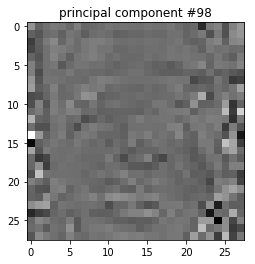

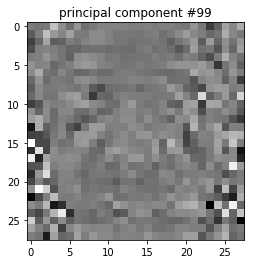

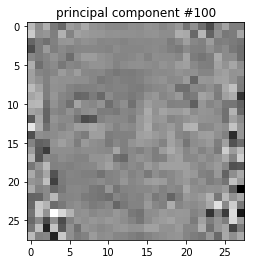

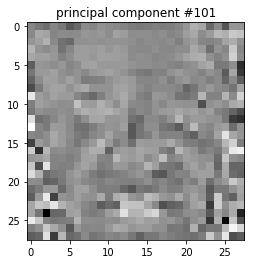

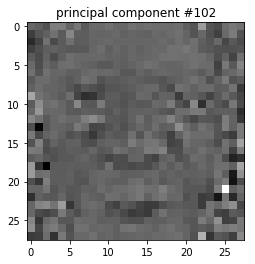

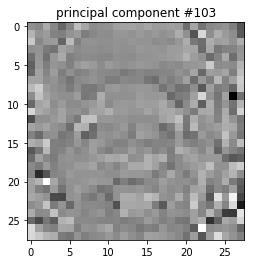

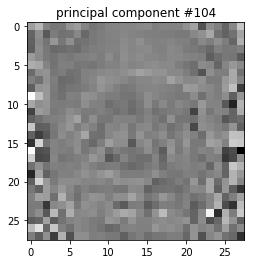

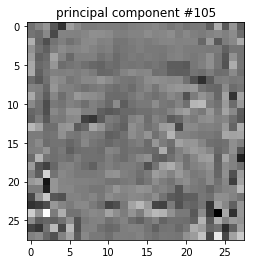

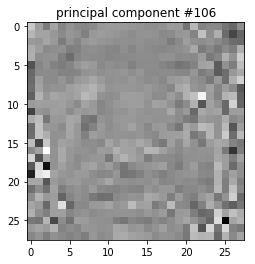

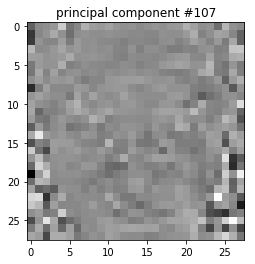

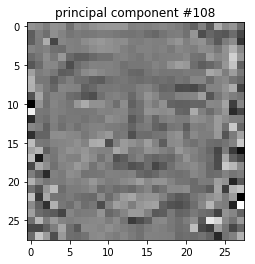

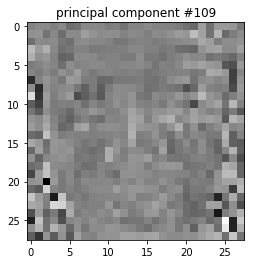

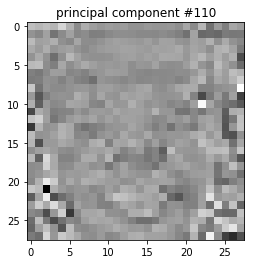

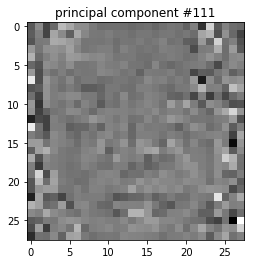

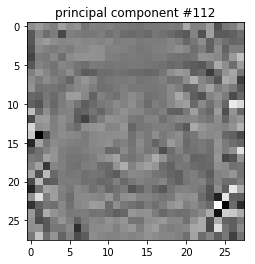

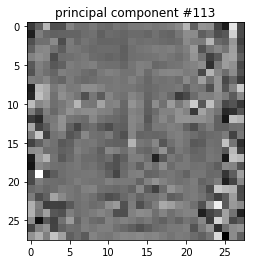

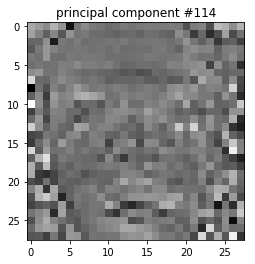

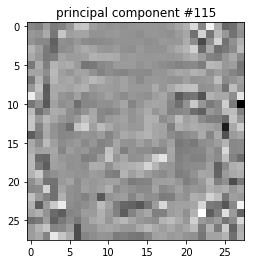

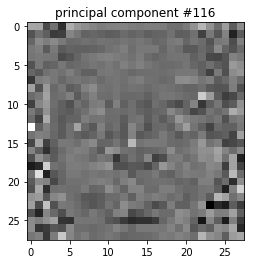

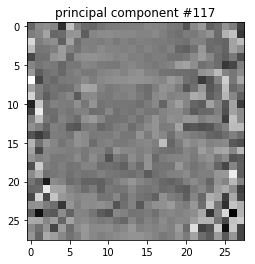

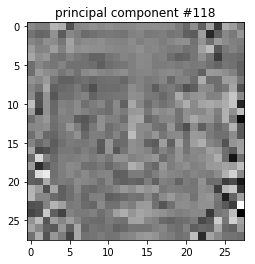

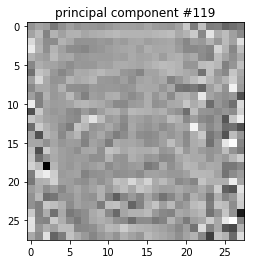

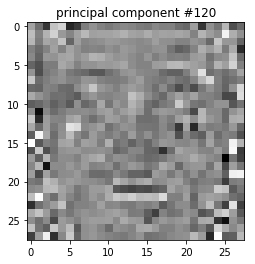

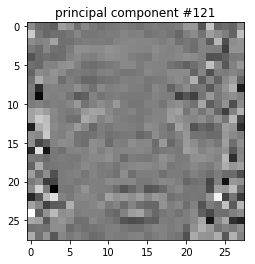

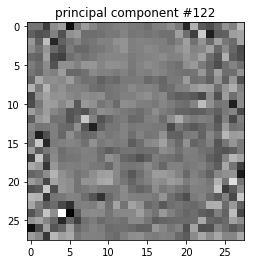

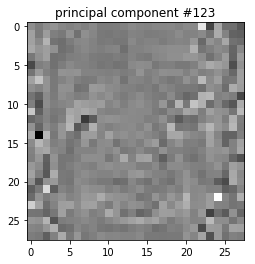

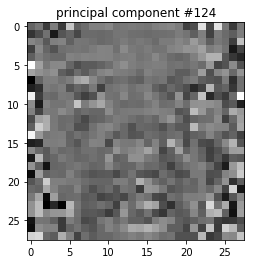

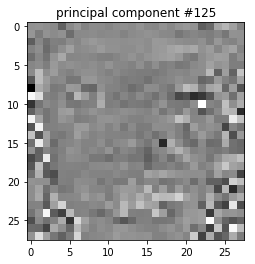

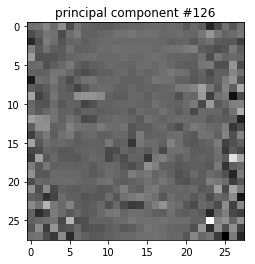

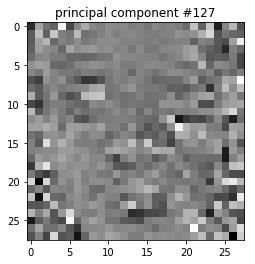

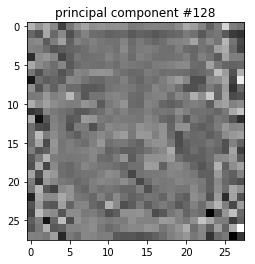

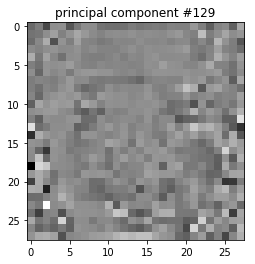

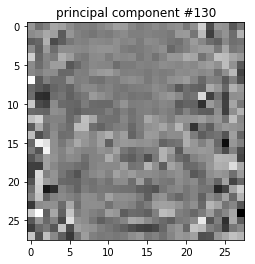

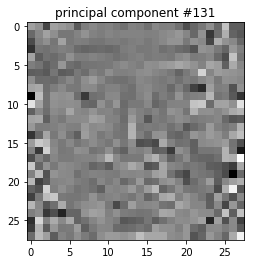

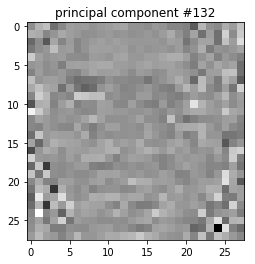

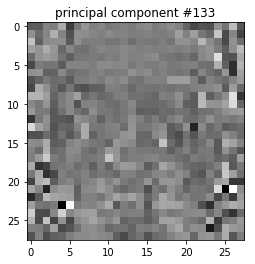

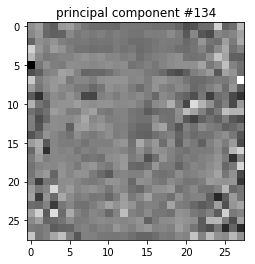

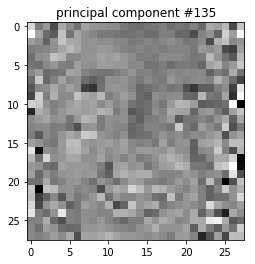

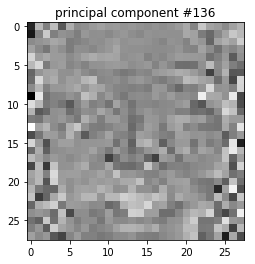

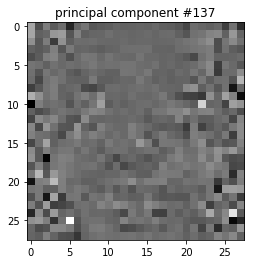

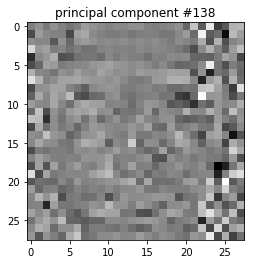

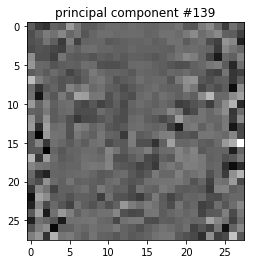

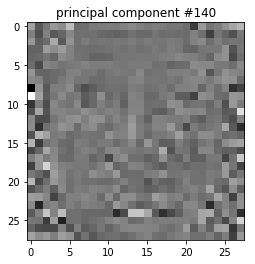

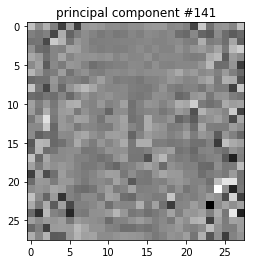

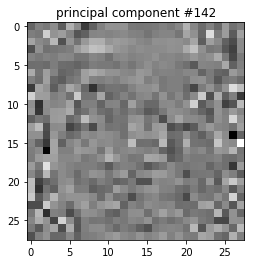

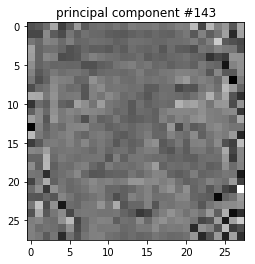

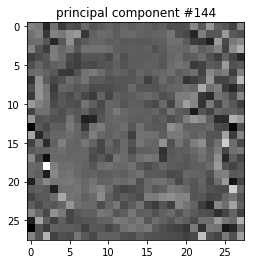

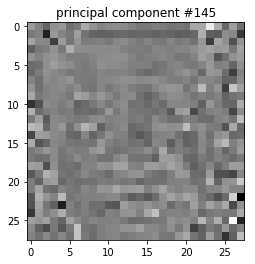

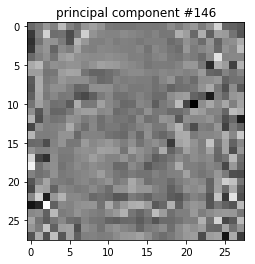

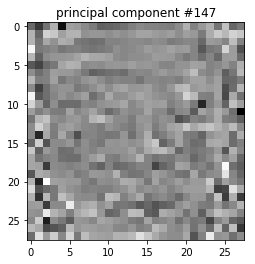

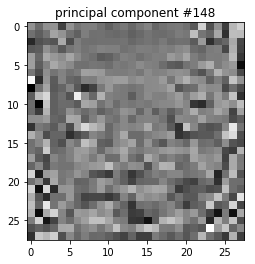

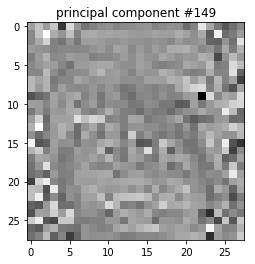

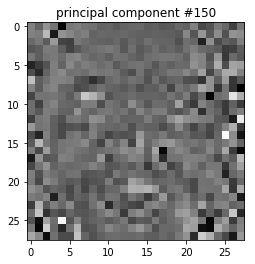

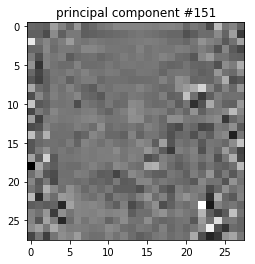

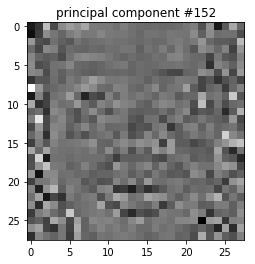

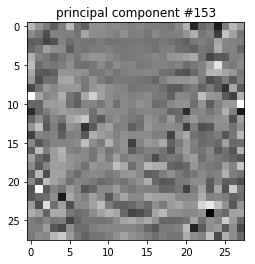

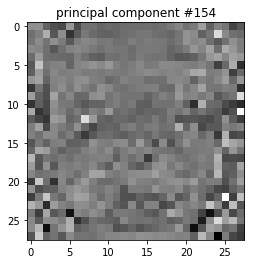

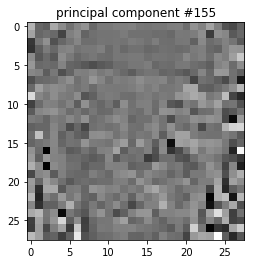

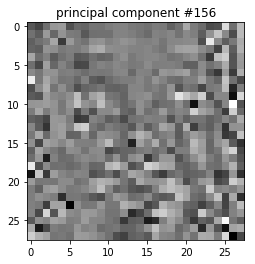

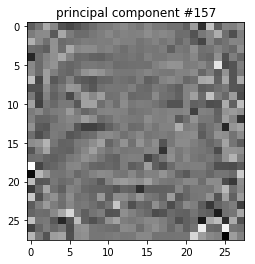

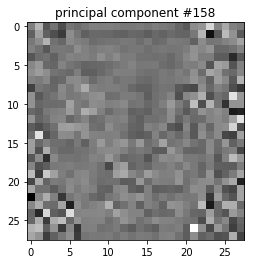

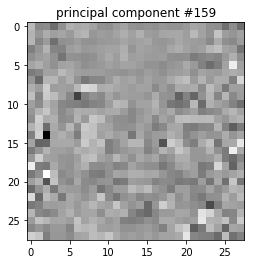

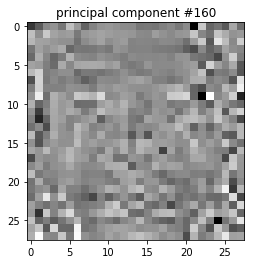

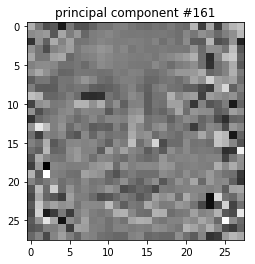

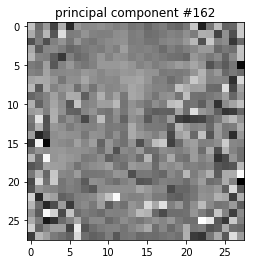

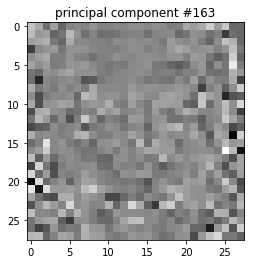

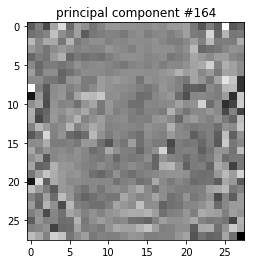

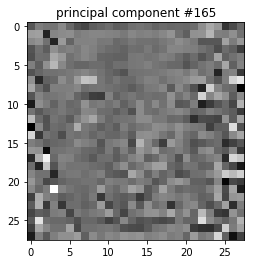

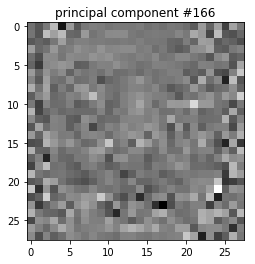

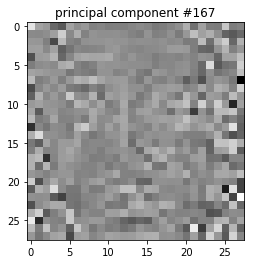

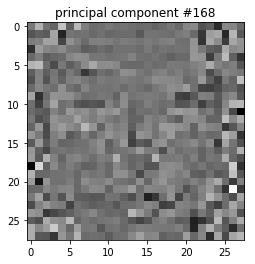

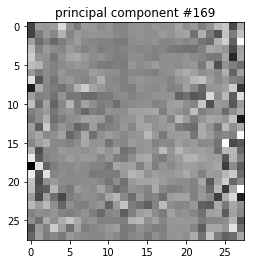

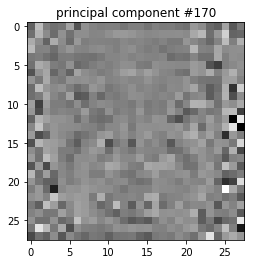

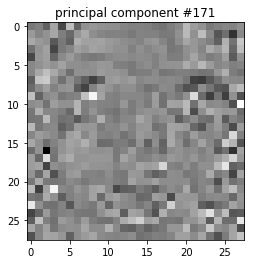

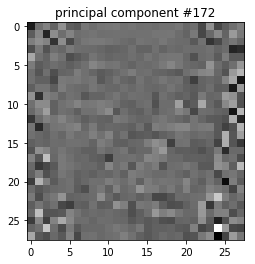

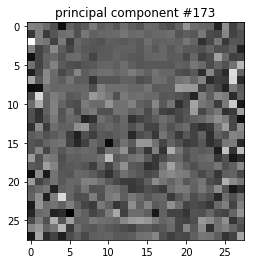

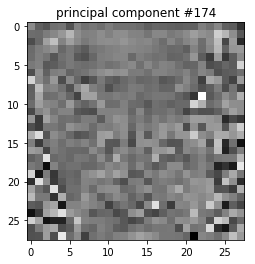

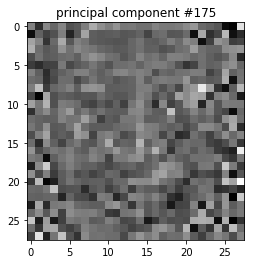

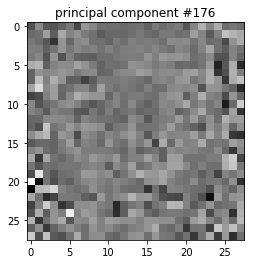

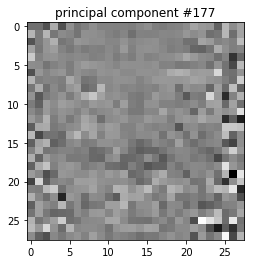

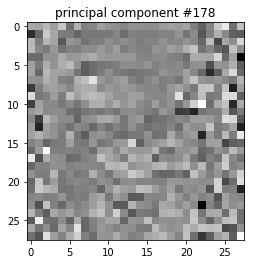

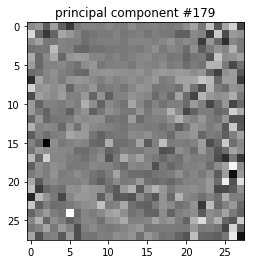

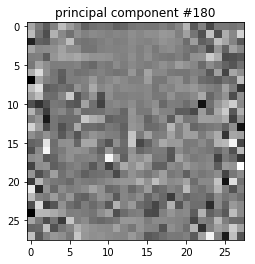

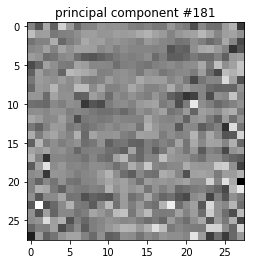

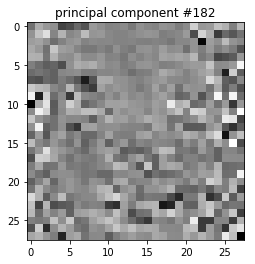

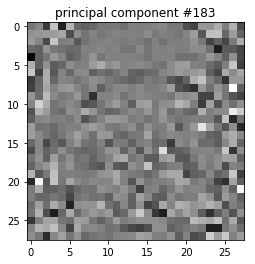

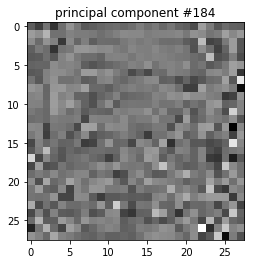

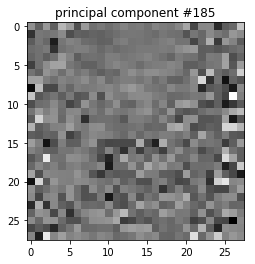

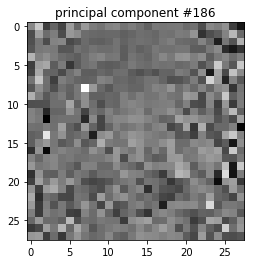

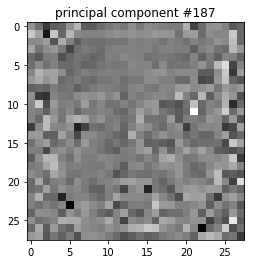

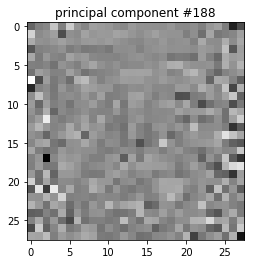

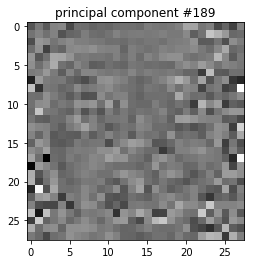

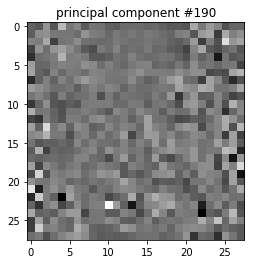

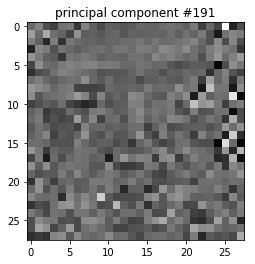

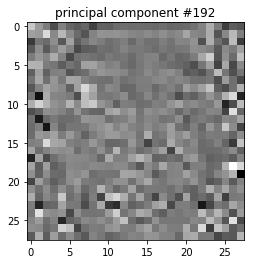

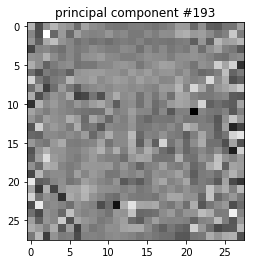

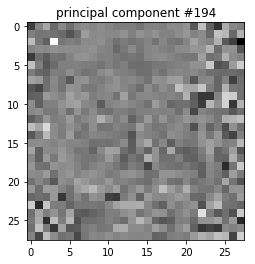

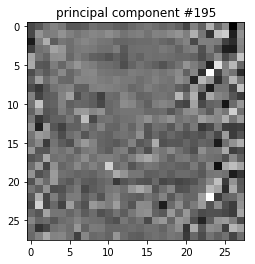

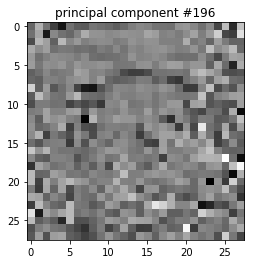

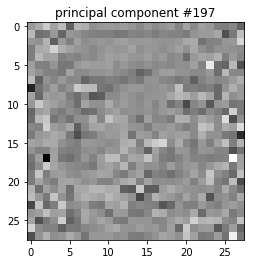

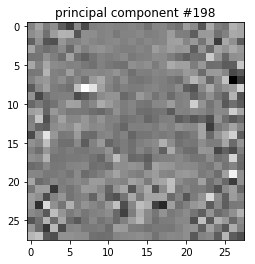

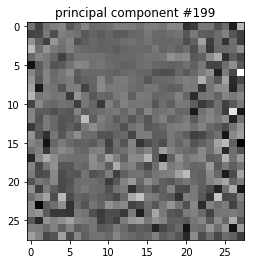

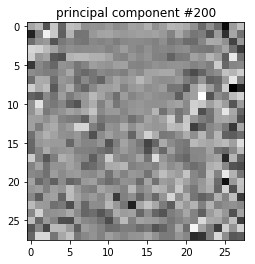

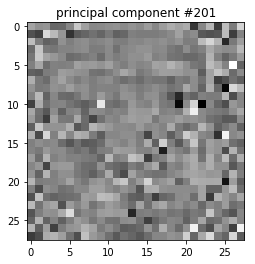

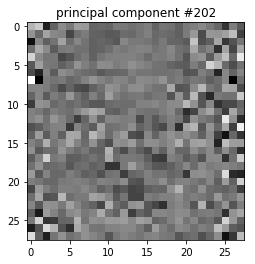

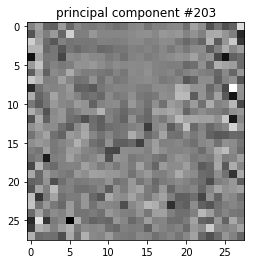

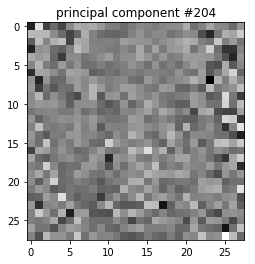

In [62]:
for i in np.arange(d):
    image = vector2image(PD[:,i])
    pl.figure()
    pl.imshow(image, cmap='gray')
    pl.title('principal component #{:d}'.format(i))
    pl.savefig('images/pca/pc{0}.png'.format(i),dpi=100)
    pl.show()

Do you think principal components above are meaningful? How do you interpret them?

### Data Projection

The following script reduces the dimensionality of a data point to $d=2$ by projecting it onto a vector space of two principal components (2-rank approximation).

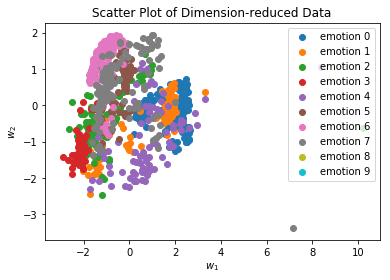

In [48]:
d = 2
Pd = PD[:, 0:d] # let's only select d of eigenvectors to reduce the dimensionality of feature vectors from D to d
W = np.dot((x_train - mu), Pd) # subtract mean vector from each row of x_train and project the difference onto reduced dimensionality eigenvector space
pl.figure()
pl.title('Scatter Plot of Dimension-reduced Data')
K = 10
for k in np.arange(K):
    pl.scatter(W[y_train==k][:, 0], W[y_train==k][:, 1], label='emotion {:d}'.format(k))
pl.xlabel(r'$w_{1}$')
pl.ylabel(r'$w_{2}$')
pl.legend();
pl.savefig('images/2d_pca.png')